# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 10 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = int(1e4)  # use this
theta = 1

def make_uniform_sample(theta, N):
  return sps.uniform(loc=0, scale=theta).rvs(size=N)

sample = make_uniform_sample(theta, N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
est_1 = 2 * np.cumsum(sample) / np.arange(1, N + 1)
est_2 = (est_1 + np.maximum.accumulate(sample)) / 2
est_3 = np.arange(2, N + 2) * np.minimum.accumulate(sample)
est_4 = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
est_5 = (1 + 1 / np.arange(1, N + 1)) * np.maximum.accumulate(sample)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

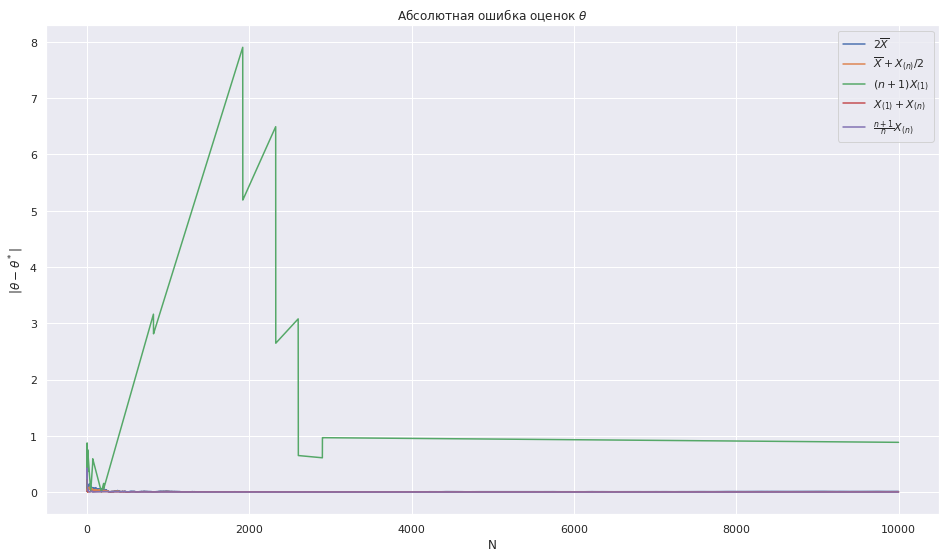

In [5]:
plt.figure(figsize=(16, 9))
plt.title(r"Абсолютная ошибка оценок $\theta$")
plt.plot(np.arange(N), abs([theta] * N - est_1), label=r'$2\overline{X}$')
plt.plot(np.arange(N), abs([theta] * N - est_2), label=r'$\overline{X} + X_{(n)}/ 2$')
plt.plot(np.arange(N), abs([theta] * N - est_3), label=r'$(n+1)X_{(1)}$')
plt.plot(np.arange(N), abs([theta] * N - est_4), label=r'$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(N), abs([theta] * N - est_5), label=r'$\frac{n+1}{n} X_{(n)}$')
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$|\theta - \theta^*|$')
plt.show()

Видно, что оценка $(n+1)X_{(1)}$ в отличие от других не является состоятельной оценкой $\theta$ и сходится гораздо медленнее. Рассмотрим график без нее и подберем оптимальные границы.

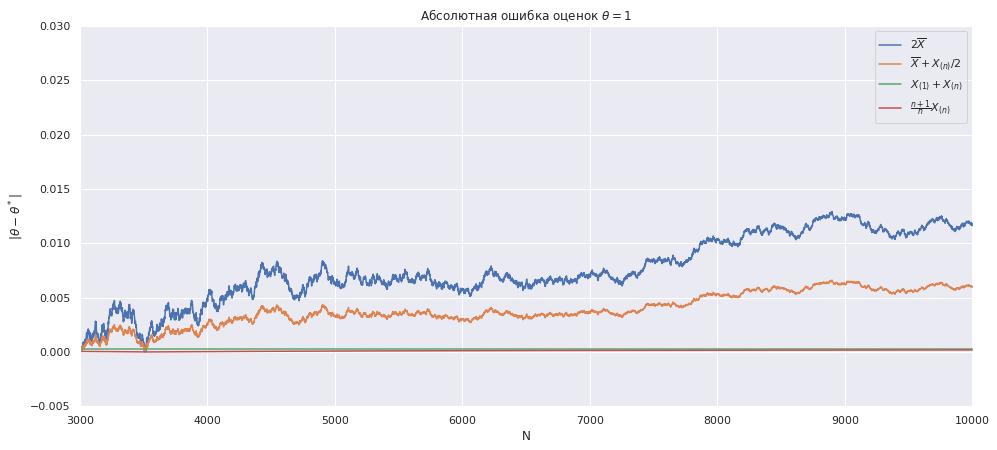

In [6]:
plt.figure(figsize=(16, 7))
plt.title(r"Абсолютная ошибка оценок $\theta=1$")
plt.plot(np.arange(N), abs([theta] * N - est_1), label=r'$2\overline{X}$')
plt.plot(np.arange(N), abs([theta] * N - est_2), label=r'$\overline{X} + X_{(n)}/ 2$')
plt.plot(np.arange(N), abs([theta] * N - est_4), label=r'$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(N), abs([theta] * N - est_5), label=r'$\frac{n+1}{n} X_{(n)}$')
plt.ylim(-0.005, 0.03)
plt.xlim(3000, N + 1)
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$|\theta - \theta^*|$')
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ Наименьший модуль разности при $n = N$ получился у оценки $\frac{n+1}{n} X_{(n)}$. 

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

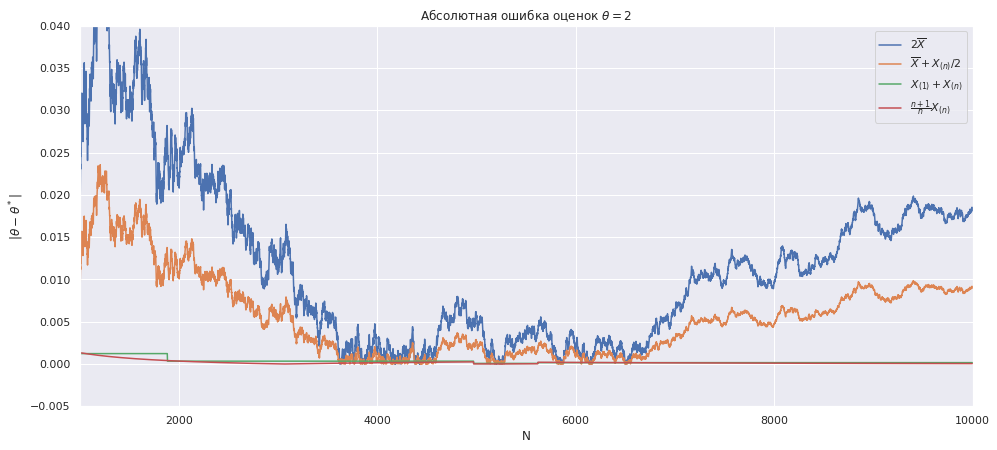

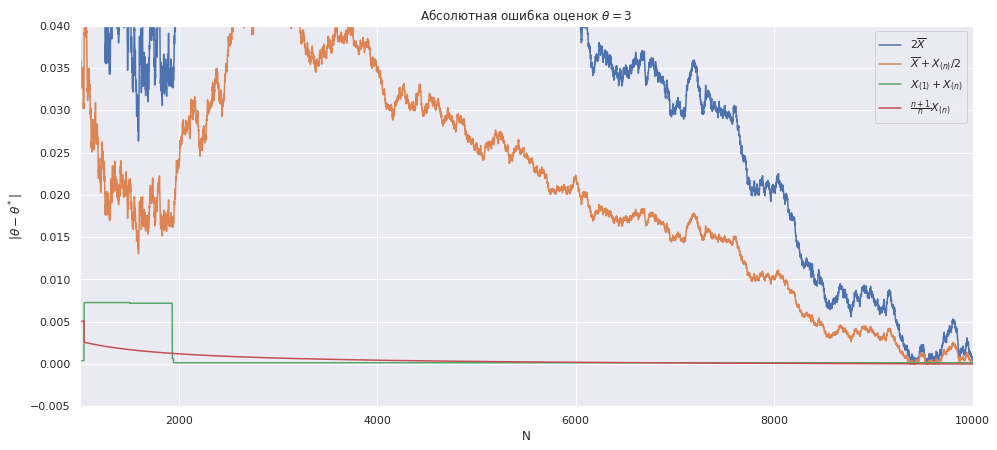

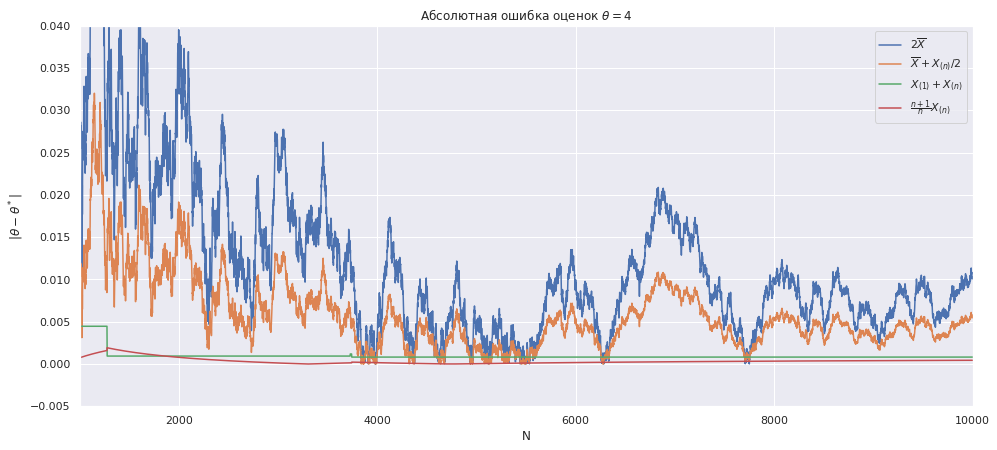

In [7]:
for theta in range(2, 5):
  sample = make_uniform_sample(theta, N)
  est_1 = 2 * np.cumsum(sample) / ( np.arange(N) + 1)
  est_2 = np.cumsum(sample) / ( np.arange(N) + 1) + np.maximum.accumulate(sample) / 2
  est_3 = np.arange(2, N + 2) * np.minimum.accumulate(sample)
  est_4 = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
  est_5 = np.arange(2, N + 2) * np.maximum.accumulate(sample) / np.arange(1, N + 1)
  plt.figure(figsize=(16, 7))
  plt.title(r"Абсолютная ошибка оценок $\theta=${0}".format(theta))
  plt.plot(np.arange(N), abs([theta] * N - est_1), label=r'$2\overline{X}$')
  plt.plot(np.arange(N), abs([theta] * N - est_2), label=r'$\overline{X} + X_{(n)}/ 2$')
  plt.plot(np.arange(N), abs([theta] * N - est_4), label=r'$X_{(1)}+X_{(n)}$')
  plt.plot(np.arange(N), abs([theta] * N - est_5), label=r'$\frac{n+1}{n} X_{(n)}$')
  plt.ylim(-0.005, 0.04)
  plt.xlim(1000, N + 1)
  plt.legend()
  plt.xlabel('N')
  plt.ylabel(r'$|\theta - \theta^*|$')
  plt.show()

Сделайте вывод.


__Вывод:__ Для семейства равномерных распределений оценки, содержащие выборочные средние сходятся медленнее, чем оценки с порядковыми статистиками. 

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [8]:
N = int(1e4)
theta = 1

def make_exp_sample(theta, N):
  return sps.expon(scale=1/theta).rvs(size=N)


Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [9]:
def get_estimate(sample, k):
  return (np.math.factorial(k) / (np.cumsum(sample ** k) / np.arange(1, N + 1))) ** (1 / k)

def make_plot(sample, theta, N, ylim):
  estimates = [get_estimate(sample, k) for k in range(1, 11)]
  plt.figure(figsize=(16, 9))
  plt.title(r"Абсолютная ошибка оценок $\theta=${0}".format(theta))
  for k in range(1, 11):
    plt.plot(np.arange(N), abs([theta] * N - get_estimate(sample, k)), label=r'$k=${0}'.format(k))  
  plt.ylim(ylim[0], ylim[1])
  plt.legend(loc='upper right')
  plt.xlabel('N')
  plt.ylabel(r'$|\theta - \theta^*|$')
  plt.show()


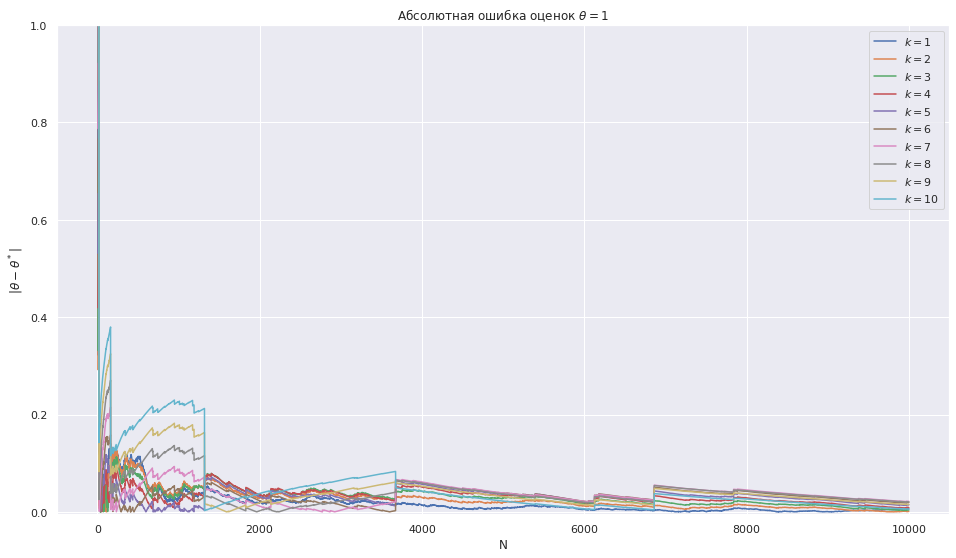

In [10]:
sample = make_exp_sample(theta, N)
make_plot(sample, theta, N, ylim=[-0.005, 1])

Увеличим масштаб

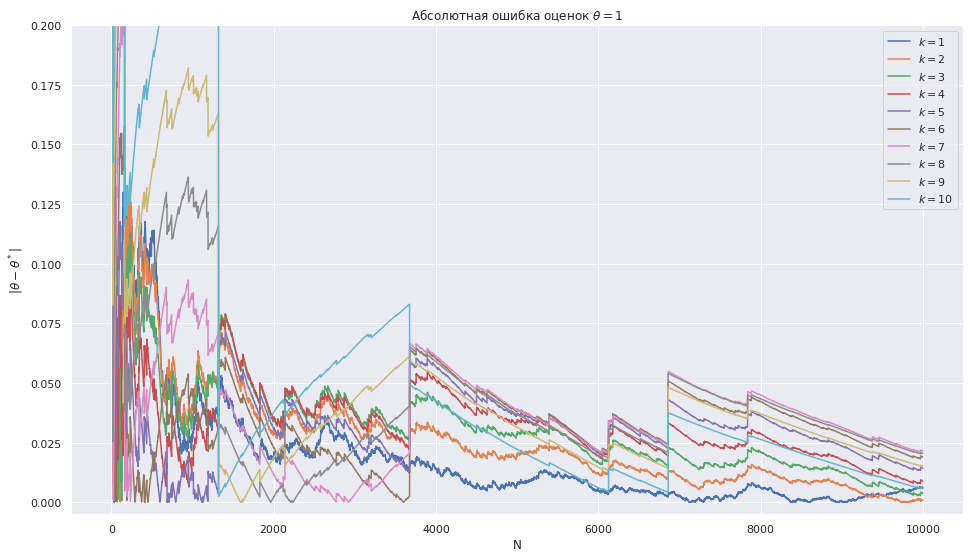

In [11]:
make_plot(sample, theta, N, ylim=[-0.005, 0.2])

Посмотрим на модуль разности при $\theta = 2, 3, 4$

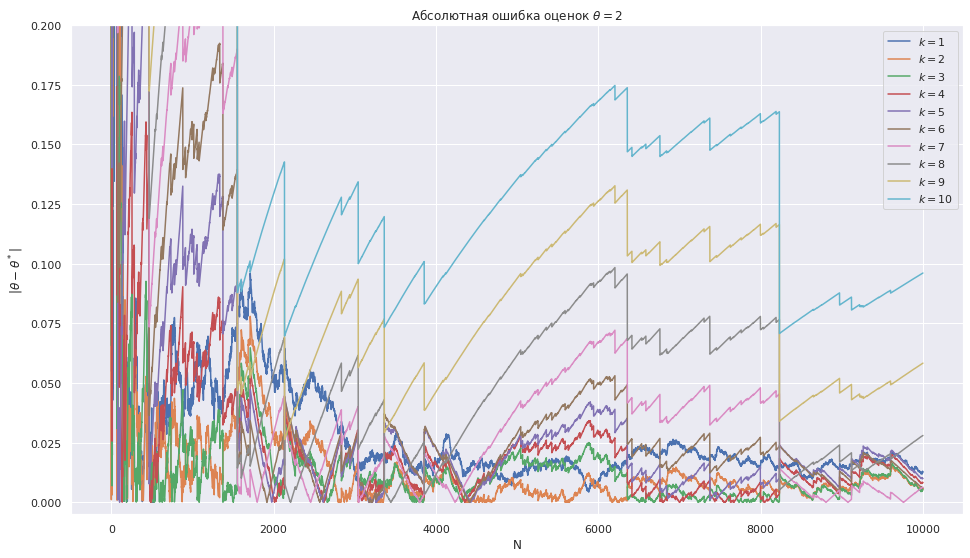

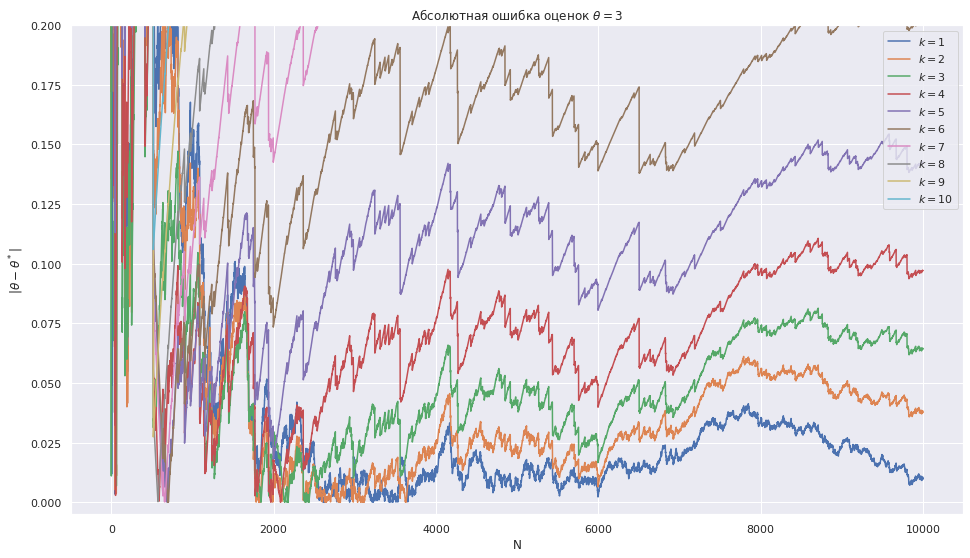

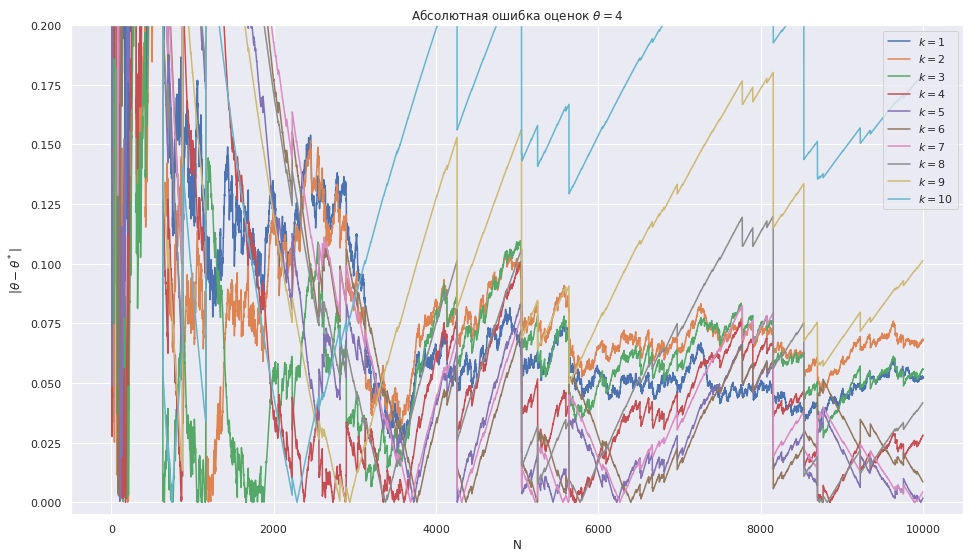

In [12]:
for theta in range(2, 5):
  sample = make_exp_sample(theta, N)
  make_plot(sample, theta, N, ylim=[-0.005, 0.2])

Сделайте вывод.


__Вывод:__
Из полученных графиков можем сделать вывод, что при $k=1$ мы получаем наименьший модуль разности оценки и параметра. 

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Возьмем распределение $Pareto(5)$ с плотностью $$p(x) = \frac{5}{x^6}\mathbf{I}(x\ge 1)$$ 
Тогда получим необходимое: $$Ex^5 = \int\limits_1^{+\infty}\frac{5}{x}dx$$ - интеграл расходится.


In [13]:
N = int(1e4)
sample = sps.pareto(b=5).rvs(size=N)


Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

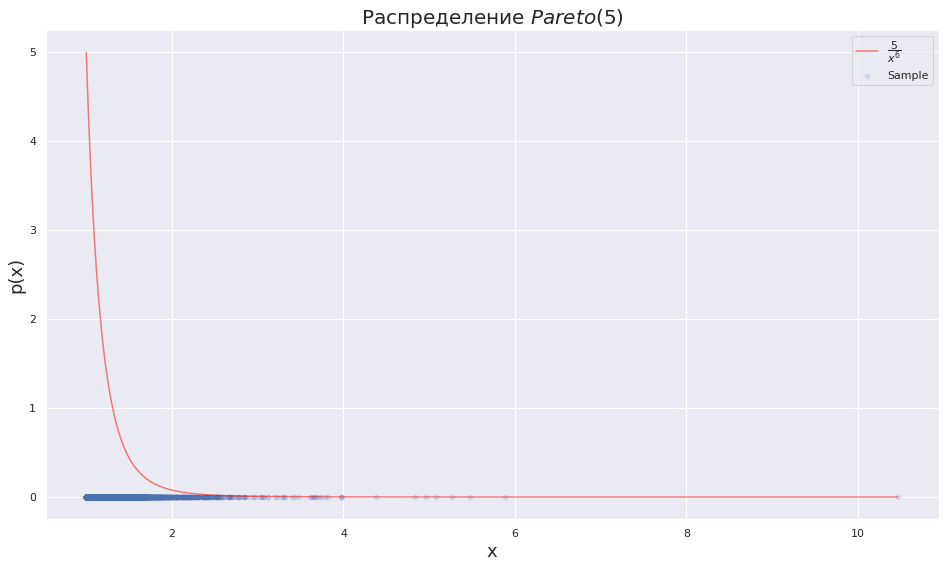

In [14]:
grid = np.linspace(1, sample.max(), N)
plt.figure(figsize=(16, 9))
plt.scatter(sample, [0] * N, alpha=0.15, s=20, label='Sample')
plt.plot(grid, sps.pareto(b=5).pdf(grid), alpha=0.5, color='red', label=r'$\dfrac{5}{x^6}$')
plt.legend()
plt.title(r'Распределение $Pareto(5)$', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('p(x)', fontsize=18)
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [15]:
s = np.cumsum(sample ** 2) / np.arange(1, N + 1) - (np.cumsum(sample) / np.arange(1, N + 1)) ** 2


Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

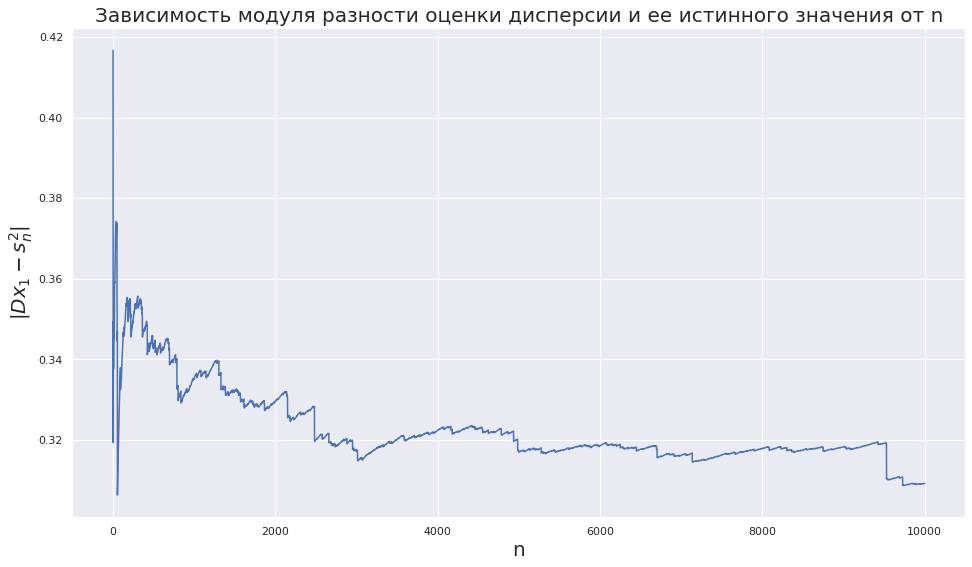

In [16]:
dif = np.fabs(5/12 - s)
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1, N + 1), dif)
plt.title('Зависимость модуля разности оценки дисперсии и ее истинного значения от n', fontsize=20)
plt.xlabel('n', fontsize=20)
plt.ylabel(r'$|Dx_1 - s^2_n|$', fontsize=20)
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [17]:
sample_cauchy = sps.cauchy.rvs(size=N)
s_cauchy = np.cumsum(sample_cauchy ** 2) / np.arange(1, N + 1) - (np.cumsum(sample_cauchy) / np.arange(1, N + 1)) ** 2


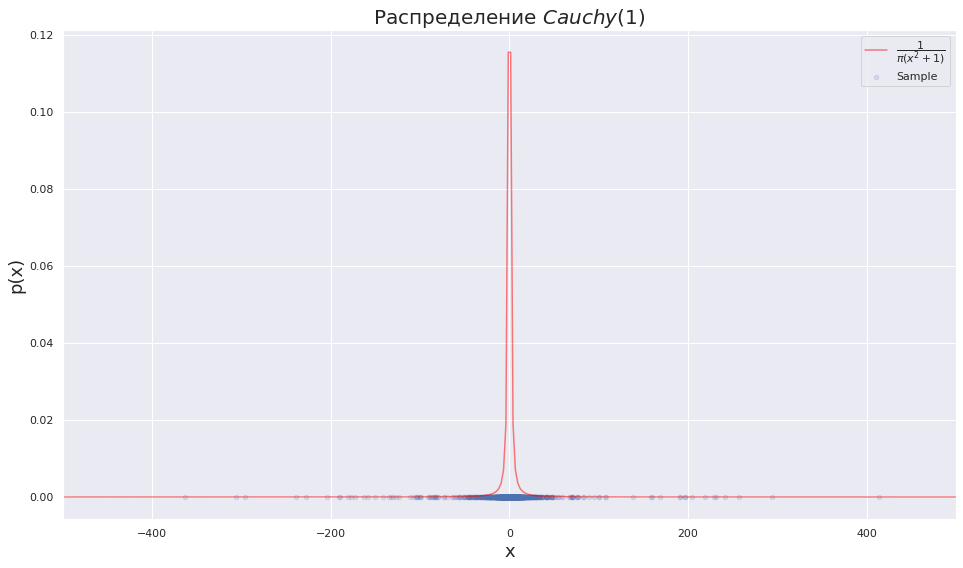

In [18]:
grid = np.linspace(-np.fabs(sample_cauchy).max(), np.fabs(sample_cauchy).max(), N)
plt.figure(figsize=(16, 9))
plt.scatter(sample_cauchy, [0] * N, alpha=0.15, s=20, label='Sample')
plt.plot(grid, sps.cauchy.pdf(grid), alpha=0.5, color='red', label=r'$\dfrac{1}{\pi (x^2 + 1)}$')
plt.legend()
plt.title(r'Распределение $Cauchy(1)$', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('p(x)', fontsize=18)
plt.xlim(-500, 500)
plt.show()


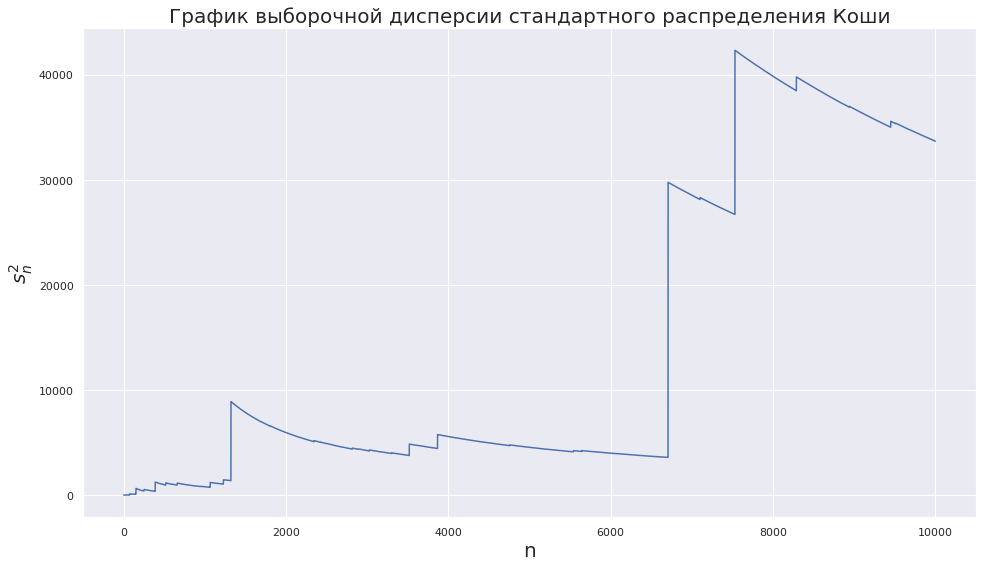

In [19]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1, N + 1), s_cauchy)
plt.title('График выборочной дисперсии стандартного распределения Коши', fontsize=20)
plt.xlabel('n', fontsize=20)
plt.ylabel(r'$s^2_n$', fontsize=20)
plt.show()

__Вывод:__ 
1. Для распределения Парето с параметром $\alpha=5$ выборочная дисперсия является асимптотически нормальной. 
2. Для распределения Коши выборочная дисперсия несостоятельна как оценка.

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [20]:
N = int(1e4)
sample = sps.norm.rvs(size=N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [21]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
  
ecdf_list = np.array([ECDF(sample[:i]) for i in range(1, N + 1)])


Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различных значений $n$).

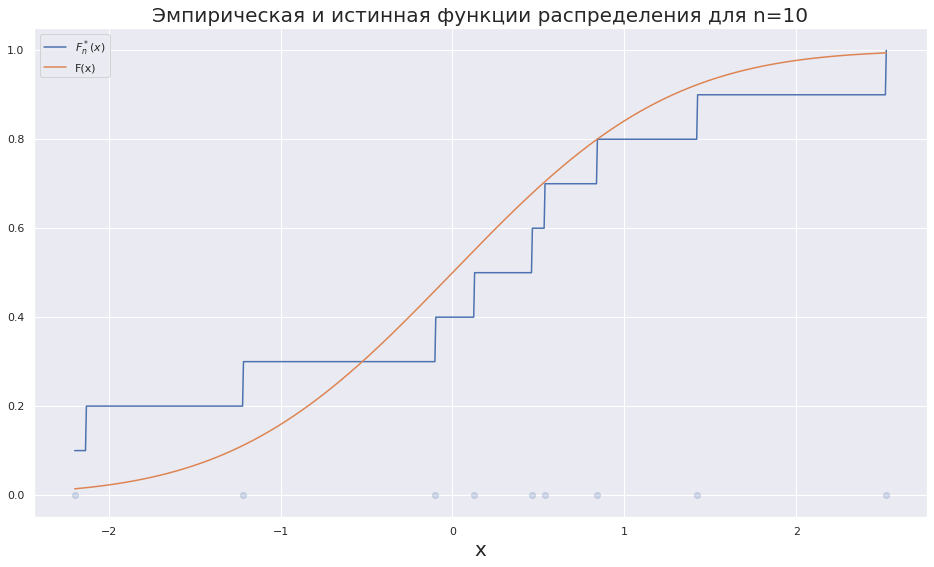

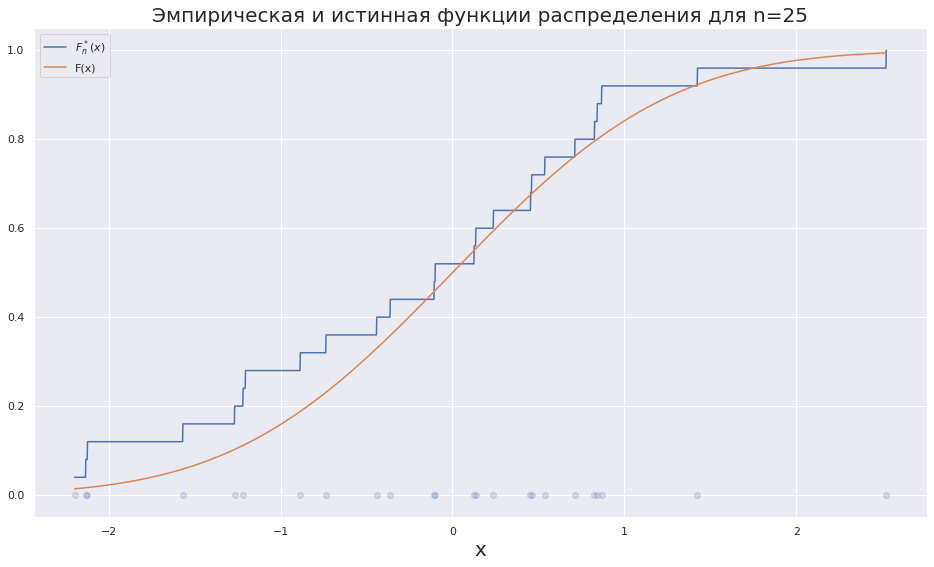

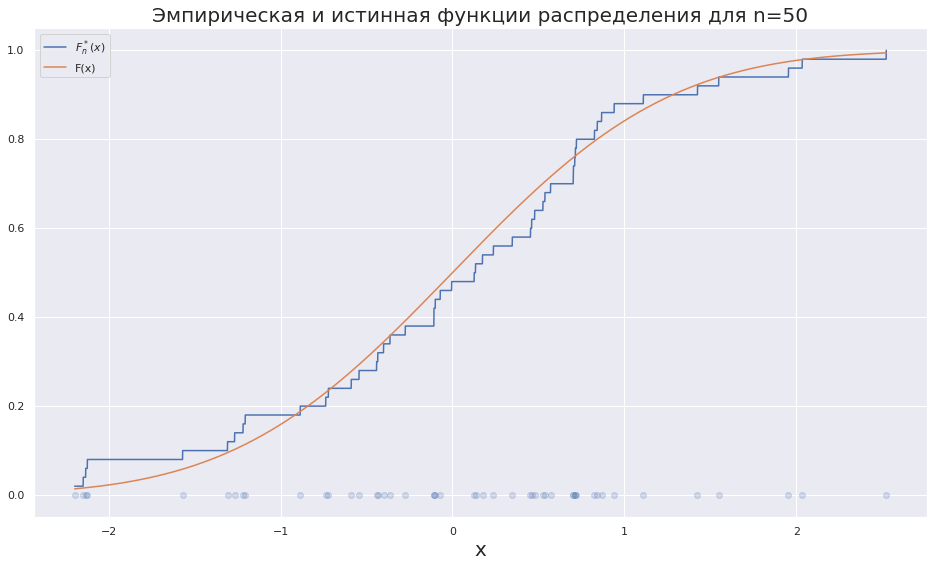

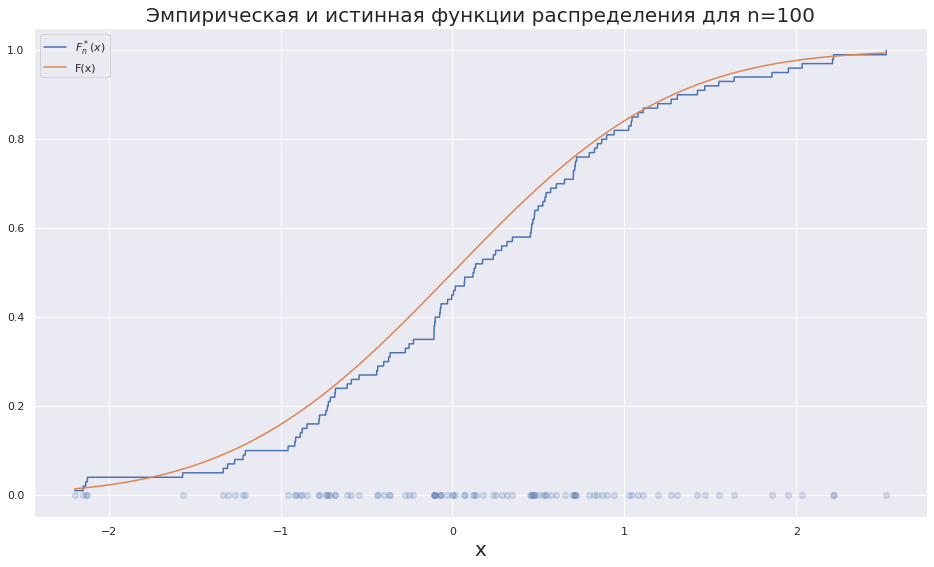

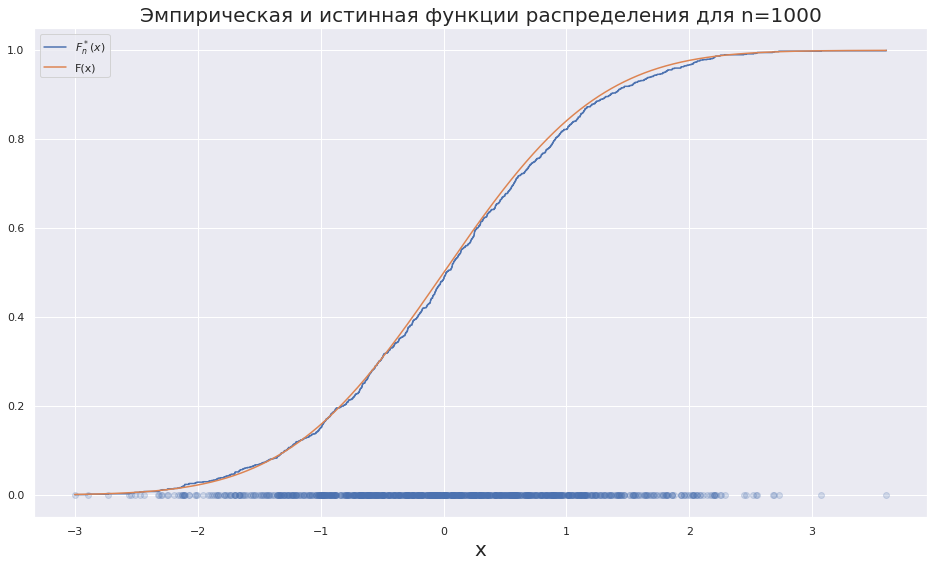

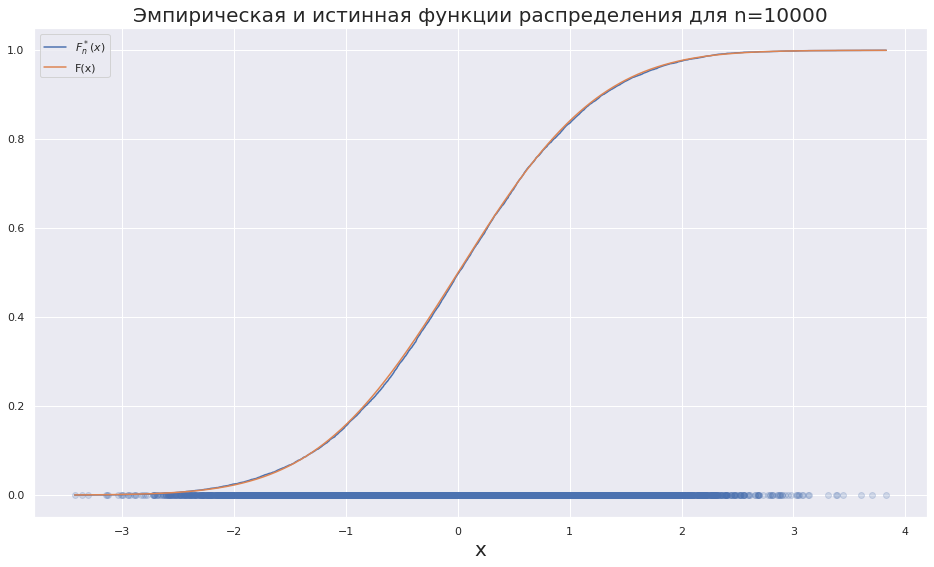

In [22]:
nn = np.array([10, 25, 50, 100, 1000, N]) - 1
for n in nn:
  grid = np.linspace(sample[:n].min(), sample[:n].max(), n*100)
  plt.figure(figsize=(16, 9))
  plt.plot(grid, ecdf_list[n](grid), label=r'$F^*_n(x)$')
  plt.plot(grid, sps.norm.cdf(grid), label=r'F(x)')
  plt.scatter(sample[:n], [0] * n, alpha=0.2)
  plt.legend()
  plt.xlabel('x', fontsize=20)
  plt.title(f'Эмпирическая и истинная функции распределения для n={n+1}', fontsize=20)
  plt.show()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [23]:
d_list = [np.fabs(ecdf_list[i - 1](sample[:i]) - sps.norm.cdf(sample[:i])).max() for i in range(1, N+1)]

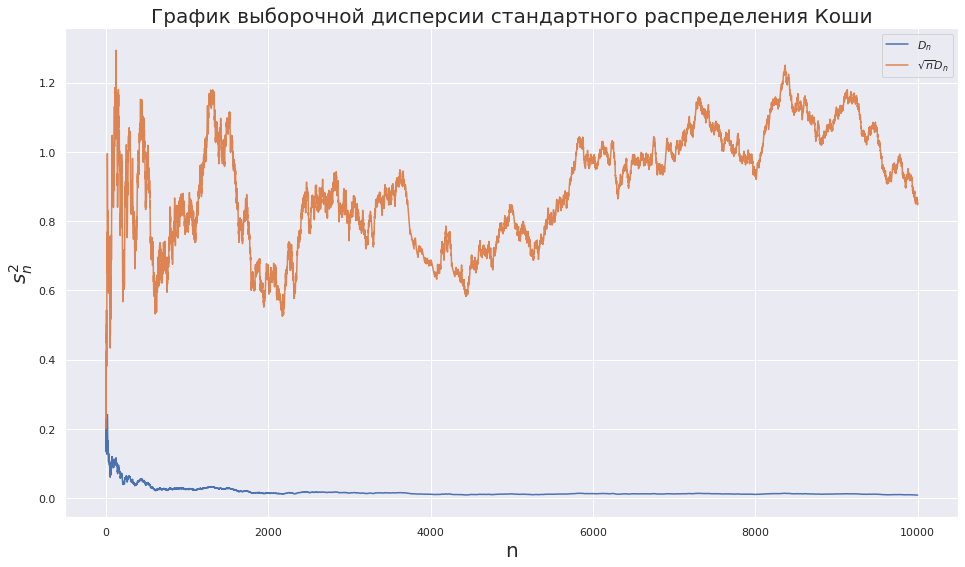

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(1, N + 1), d_list, label=r'$D_{n}$')
plt.plot(np.arange(1, N + 1), d_list * np.sqrt(np.arange(1, N + 1)), label=r'$\sqrt{n}D_{n}$')
plt.title('График выборочной дисперсии стандартного распределения Коши', fontsize=20)
plt.legend()
plt.xlabel('n', fontsize=20)
plt.ylabel(r'$s^2_n$', fontsize=20)
plt.show()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

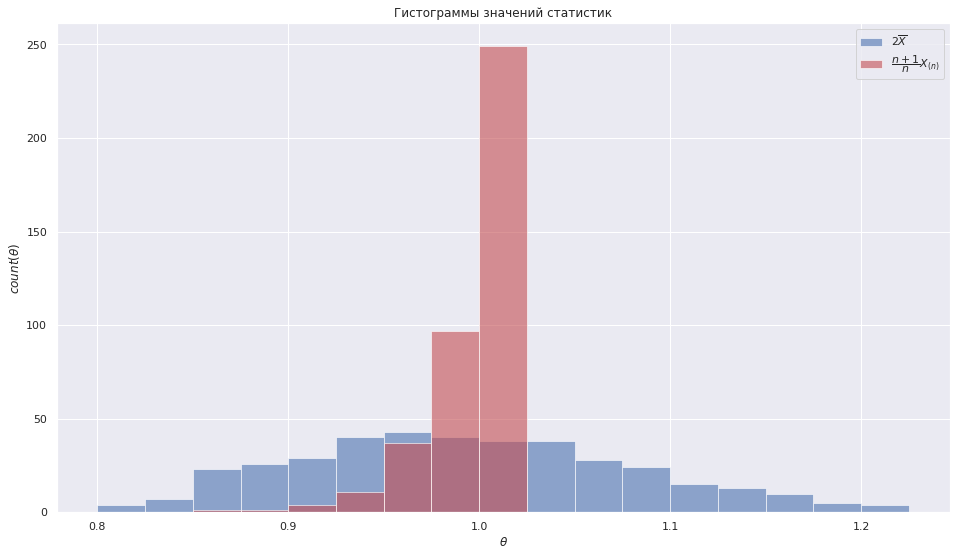

In [25]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

samples = sps.uniform(0, 1).rvs((N_samples, N))
ests_1 = 2 * np.sum(samples, axis=1) / N
ests_2 = (N + 1) / N * samples.max(axis=1)

plt.figure(figsize=(16, 9))
plt.title('Гистограммы значений статистик')
plt.hist(ests_1, bins=bins, alpha=0.6, color='b', label=r'$2\overline{X}$')
plt.hist(ests_2, bins=bins, alpha=0.6, color='r', label=r'$\dfrac{n+1}{n}X_{(n)}$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$count(\theta)$')
plt.legend()
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

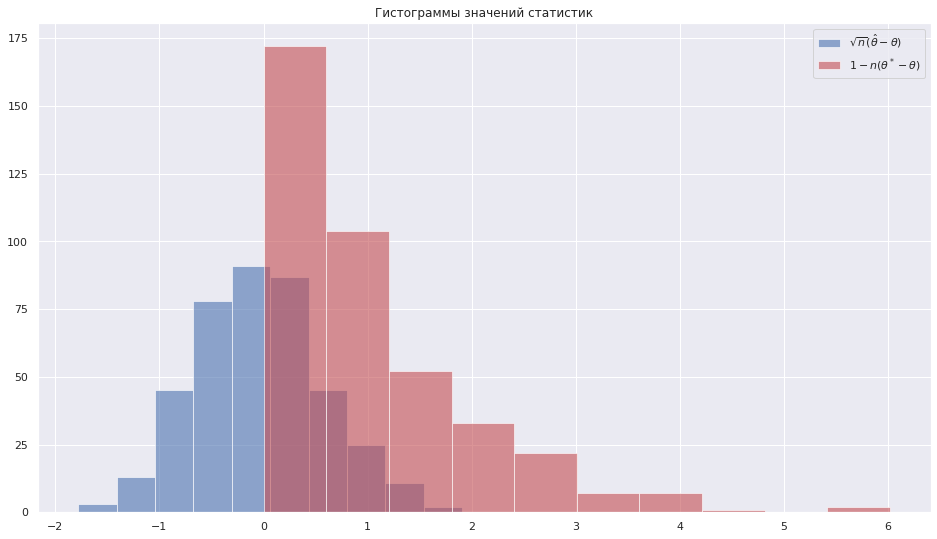

In [26]:
plt.figure(figsize=(16, 9))
plt.title('Гистограммы значений статистик')
plt.hist(np.sqrt(N) * (ests_1 - 1), alpha=0.6, color='b', label=r'$\sqrt{n} (\hat\theta - \theta)$')
plt.hist(1 - N * (ests_2 - 1), alpha=0.6, color='r', label=r'$1 - n  (\theta^* - \theta)$')
plt.legend()
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:**
Для $\hat\theta$ на нормальное, для $\theta^*$ на экспоненциальное

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sigma(\theta)} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\sigma(\theta) = \frac{\theta}{\sqrt{3}}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sigma(\theta)}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

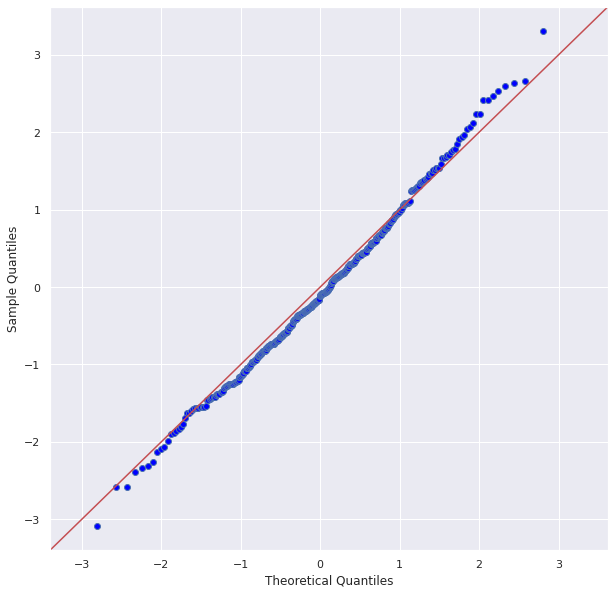

In [27]:
import statsmodels.api as sm


theta_norm = np.sqrt(3 * N) * (ests_1 - np.ones(N_samples))
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Да, можно

Вернемся к статистике $1 - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соответствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** $Exp(1)$


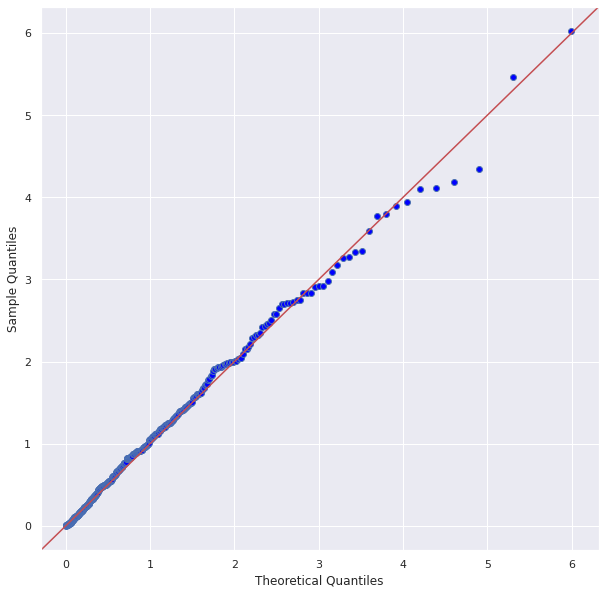

In [28]:
theta_nenorm = 1 - N * (ests_2 - 1)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_nenorm, sps.expon, line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**
Нет, не плохо. Оценка $\theta^*$ сходится быстрее и имеет меньшую дисперсию.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.